In honor of clowns and D.E.I. (Diversity, Equity, and Inclusion), we will build a generalization of a Red-Black tree: A diverse rainbow-colored binary tree, as we traverse its pre-order array with leaf information present so we can reconstruct the exact tree.

_Given an array `pre[]` that represents the preorder traversal of a binary tree where every node has either 0 or 2 children.
One more array `preLN[]` is given which has only two possible values L and N. The value L in `preLN[]` indicates that the corresponding node is a leaf node and the value N indicates that the corresponding node is a non-leaf node._

The task is to construct the binary tree from the given two arrays, where each node is colored with the colors of the rainbow so that:
- The colors appear randomly going down each path downward
- The colors do not start repeating on a path until all 7 colors are exhausted


The colors of the rainbow are known as `ROYGBIV`: Red, orange, yellow, green, blue, indigo and violet.
Write code to build a tree and generate a tree with at least 100 nodes with random samples of the pre and preLN arrays.
Plot the binary tree with its colored nodes.

## Approach

First, let's break down this problem into two subproblems. Firstly, we are given a `pre` array, which represents a pre-order (Root, left, right) traversal, and a `preLN` array which contains information about Nodes and Leaf Nodes.

### First part of problem (construction of tree)

To construct the tree, we will create a node and push it onto a stack. We will check if the left child of the node is empty; if it is, we will create a new node and attach it to the parent. We will do the same for the right child. However, when we attach the right node to the parent, we will also pop the parent node from the stack, effectively backtracking in the process.

Below, `construct_tree` will create the tree from `pre` and `preLN` array

4 2 5 1 6 3 

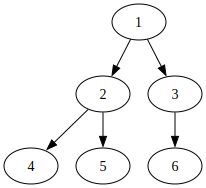

In [28]:
from typing import List
from graphviz import Digraph

class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

def construct_tree(pre, preLn):
    n = len(pre)
    if n == 0:
        return None

    st: List[TreeNode] = []

    # Create a root node, as in pre-order it's guaranteed to have arr[0] as root node
    root = TreeNode(pre[0])
    # Add root node to the stack 
    st.append(root)

    # loop over from 1 to n, as arr[0] is the root node
    for i in range(1, n):
        curr = TreeNode(pre[i])

        # we will first check if left node is empty, then we will attach the curr to left node
        if not st[-1].left:
            st[-1].left = curr
        # we will check if the right node is empty, then we will attach the curr to right node, also pop the last element as both nodes are full
        elif not st[-1].right:
            st[-1].right = curr
            st.pop()

        # only add in stack, if it's a non-leaf node
        if preLn[i] != 'L':
            st.append(curr)

    return root

def inorder(node: TreeNode):
    if node is None:
        return
    inorder(node.left)
    print(node.val, end=" ")
    inorder(node.right)

def visualize_tree(root):
    if not root:
        return None

    dot = Digraph(comment="Binary Tree")

    def add_nodes_edges(node):
        """Helper function to add nodes and edges to the graph."""
        if node:
            dot.node(str(node.val))  # Add node
            if node.left:
                dot.edge(str(node.val), str(node.left.val))  # Left edge
                add_nodes_edges(node.left)
            if node.right:
                dot.edge(str(node.val), str(node.right.val))  # Right edge
                add_nodes_edges(node.right)

    add_nodes_edges(root)
    return dot

# Example Preorder and PreLN arrays
pre = [1, 2, 4, 5, 3, 6]
preLN = ['N', 'N', 'L', 'L', 'N', 'L']

# Construct and visualize tree
root = construct_tree(pre, preLN)
inorder(root)

# Generate Graphviz visualization
tree_viz = visualize_tree(root)
tree_viz


### Second part of the problem (generation of tree)
To generate a full binary tree, we use a Breadth-First Search (BFS) approach with a queue. The key distinction from traditional BFS is that instead of immediately dequeuing nodes, we first peek at the front of the queue, create two child nodes, and attach them to the current node. Only after this process do we remove the node from the queue. This ensures that each node gets exactly two children before being processed further. We continue this process until we reach the required number of nodes.

### Third part of the problem (color of tree)


Inorder traversal with assigned colors:
Value: 52, Color: Green
Value: 35, Color: Blue
Value: 33, Color: Green
Value: 16, Color: Indigo
Value: 10, Color: Green
Value: 21, Color: Blue
Value: 12, Color: Green
Value: 19, Color: Orange
Value: 52, Color: Blue
Value: 75, Color: Green
Value: 93, Color: Blue
Value: 68, Color: Indigo
Value: 38, Color: Blue
Value: 6, Color: Green
Value: 79, Color: Blue
Value: 86, Color: Yellow
Value: 17, Color: Blue
Value: 89, Color: Orange
Value: 84, Color: Blue
Value: 24, Color: Green
Value: 27, Color: Blue
Value: 33, Color: Orange
Value: 2, Color: Blue
Value: 55, Color: Indigo
Value: 69, Color: Orange
Value: 45, Color: Green
Value: 82, Color: Orange
Value: 10, Color: Blue
Value: 74, Color: Green
Value: 99, Color: Orange
Value: 23, Color: Green
Value: 26, Color: Violet
Value: 46, Color: Orange
Value: 84, Color: Green
Value: 44, Color: Orange
Value: 13, Color: Yellow
Value: 51, Color: Orange
Value: 58, Color: Green
Value: 69, Color: Orange
Value: 41, Color: Blu

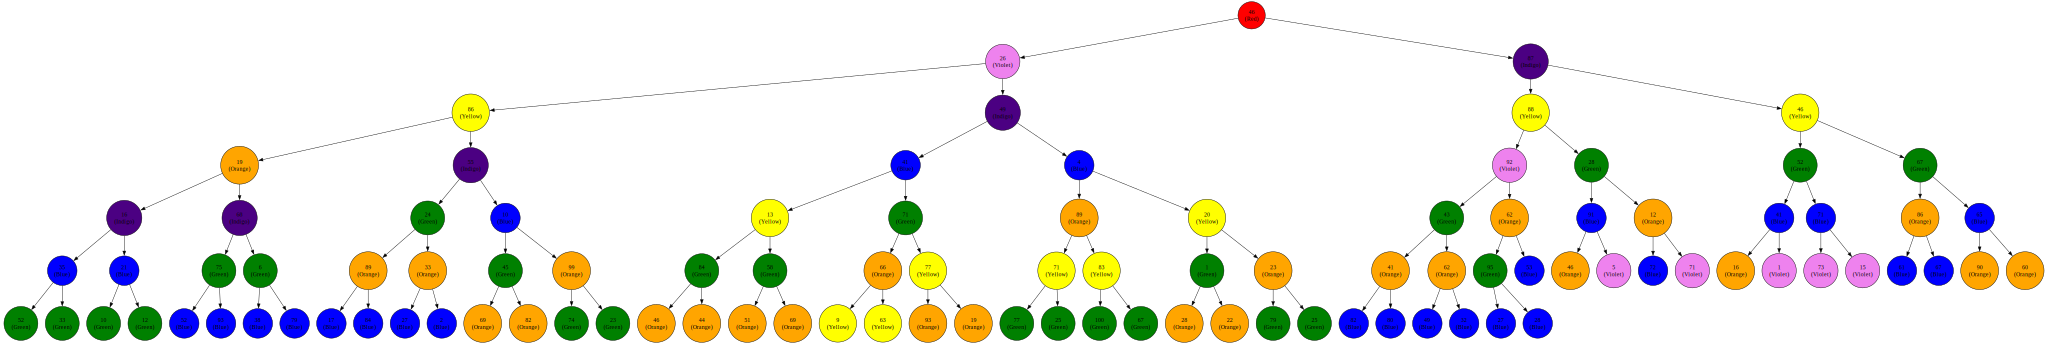

In [43]:
import random
import graphviz
from collections import deque
from typing import List, Optional

RAINBOW_COLORS = ["Violet", "Indigo", "Blue", "Green", "Yellow", "Orange", "Red"]

class TreeNode:
    def __init__(self, val: int):
        self.val = val
        self.left: Optional["TreeNode"] = None
        self.right: Optional["TreeNode"] = None
        self.color: Optional[str] = None

class BinaryTree:
    def __init__(self, root: Optional[TreeNode] = None):
        self.root = root

    @classmethod
    def generate_random_full_tree(cls, num_nodes: int = 100, max_value: int = 100) -> "BinaryTree":
        """
        Generate a random full binary tree with at least `num_nodes` nodes usin BFS.
        Each node's value is in the range [1, max_value].
        Returns the root of the generated tree.
        """
        from collections import deque
        if num_nodes <= 0:
            return None
    
        root = TreeNode(random.randint(1, max_value))
        created_nodes = 1
        queue = deque([root])
    
        while created_nodes < num_nodes:
            # peek the node
            current = queue[0]
            # If current is still a leaf, add two children
            if current.left is None and current.right is None:
                left_child = TreeNode(random.randint(1, max_value))
                right_child = TreeNode(random.randint(1, max_value))
                current.left = left_child
                current.right = right_child
                queue.append(left_child)
                queue.append(right_child)
                created_nodes += 2
            # pop the element after creating left and right nodes
            queue.popleft()
            # break if created nodes esceeds num_nodes
            if created_nodes >= num_nodes:
                break
    
        return cls(root)


    def get_pre_and_preLN(root):
        """
        Preorder traversal to build:
            - pre[]:  node values in preorder
            - preLN[]: 'L' if leaf, 'N' if internal node
        """
        pre = []
        preLN = []
    
        def preorder(node):
            if not node:
                return
            # append the value to pre
            pre.append(node.val)
            # add 'L' if both the left and right node is None
            if node.left is None and node.right is None:
                preLN.append('L')
            else:
                preLN.append('N')
            preorder(node.left)
            preorder(node.right)
    
        preorder(self.root)
        return pre, preLN

    def construct_tree(cls, pre: List[int], preLN: List[str]) -> "BinaryTree":
        """
        Constructs the binary tree from pre[] and preLN[] arrays.
        """
        n = len(pre)
        if n == 0:
            return None
    
        st: List[TreeNode] = []
    
        # Create a root node, as in pre-order it's guaranteed to have arr[0] as root node
        root = TreeNode(pre[0])
        # Add root node to the stack 
        st.append(root)
    
        # loop over from 1 to n, as arr[0] is the root node
        for i in range(1, n):
            curr = TreeNode(pre[i])
    
            # we will first check if left node is empty, then we will attach the curr to left node
            if not st[-1].left:
                st[-1].left = curr
            # we will check if the right node is empty, then we will attach the curr to right node, 
            # also pop the last element as both nodes are full
            elif not st[-1].right:
                st[-1].right = curr
                st.pop()
    
            # only add in stack, if it's a non-leaf node
            if preLn[i] != 'L':
                st.append(curr)
    
        return cls(root)

    def inorder(self):
        """
        inorder traversal to print the value and color of each node.
        """
        def _inorder(node: TreeNode):
            if node is None:
                return
            _inorder(node.left)
            print(f"Value: {node.val}, Color: {node.color}")
            _inorder(node.right)

        _inorder(self.root)


    def visualize(self) -> Optional[graphviz.Digraph]:
        """
        Visualize a binary tree using Graphviz in a top-down hierarchical layout.
        Returns a Digraph object which can be viewed or rendered.
        """
        if not self.root:
            return None
    
        dot = graphviz.Digraph(name="Binary_Tree")
        dot.graph_attr['rankdir'] = 'TB'
        dot.node_attr.update(shape='circle', style='filled')
    
        queue = deque([(self.root, "0")])
        next_id = 1
    
        while queue:
            node, node_id = queue.popleft()
    
            fillclr = "white"
            if node.color:
                fillclr = node.color
    
            dot.node(node_id, label=f"{node.val}\n({node.color})", fillcolor=fillclr)
    
            if node.left:
                left_id = str(next_id)
                next_id += 1
                dot.edge(node_id, left_id)
                queue.append((node.left, left_id))
    
            if node.right:
                right_id = str(next_id)
                next_id += 1
                dot.edge(node_id, right_id)
                queue.append((node.right, right_id))
    
        return dot


    def color_tree_dfs(self, colors_array: List[str]) -> None:
        """
        Color the binary tree in a DFS manner such that:
          - We do not reuse a color on the same path until we've exhausted all colors_array.
          - No siblings or ancestors have the same color (because the path's used_colors is passed down).
          - Once all colors in colors_array are used, we reset the used_color
        """
    
        def dfs(node: TreeNode, used_colors: set):
            if not node:
                return
    
            # If we've used all colors in this path, reset so we can reuse them
            if len(used_colors) == len(colors_array):
                used_colors = set()
    
            # Select a color that is not in used_colors
            available = [c for c in colors_array if c not in used_colors]
            chosen_color = random.choice(available)
            # assign color to the node
            node.color = chosen_color
    
            # By creating a copy of used_colors, each child node’s recursion has its own local 
            # set of used colors that doesn’t interfere with its sibling’s set or 
            # the parent’s set once we backtrack up the recursion.
            child_used_colors = used_colors.copy()
            # Add the newly chosen color to the child’s copy.
            child_used_colors.add(chosen_color)
    
            # Recurse for children
            dfs(node.left, child_used_colors)
            dfs(node.right, child_used_colors)
    
        dfs(self.root, set())


# 1. Generate a random full tree using the class
tree = BinaryTree.generate_random_full_tree(num_nodes=100, max_value=100)

# 2. Color the tree
RAINBOW_COLORS = ["Violet", "Indigo", "Blue", "Green", "Yellow", "Orange", "Red"]
tree.color_tree_dfs(RAINBOW_COLORS)

# 3. Print inorder with color
print("Inorder traversal with assigned colors:")
tree.inorder()

dot = tree.visualize()
dot
